# **Práctica: Análisis Exploratorio de Datos - Conjunto de Datos de Precios de Computadoras Portátiles**  

En esta práctica, utilizarás las habilidades adquiridas a lo largo de la seccion para explorar el efecto de diferentes características en el precio de las computadoras portátiles.  

## **Objetivos**  
Después de completar esta practica, podrás:  

- Visualizar patrones en características individuales.  
- Ejecutar análisis estadístico descriptivo en el conjunto de datos.  
- Utilizar agrupaciones y tablas dinámicas para analizar el efecto de variables categóricas en el precio.  
- Aplicar la correlación de Pearson para medir la interdependencia entre variables.  


## **2. Importación de las bibliotecas necesarias**
Es recomendable importar todas las bibliotecas necesarias en un solo lugar para mantener el código organizado y fácil de leer.




In [13]:
# Importar bibliotecas esenciales para el análisis de datos

import numpy as np  # Para operaciones numéricas y manejo de arreglos
import pandas as pd  # Para manipulación y análisis de datos en estructuras tabulares
import matplotlib.pyplot as plt  # Para crear visualizaciones gráficas
import seaborn as sns  # Para gráficos estadísticos avanzados
from scipy import stats  # Para análisis estadísticos avanzados

# Configuración para mostrar gráficos dentro del notebook
%matplotlib inline

# Opcional: Configuración de estilos de gráficos para una mejor visualización
plt.style.use('ggplot')  # Aplicar un estilo de gráficos más limpio
sns.set_palette('pastel')  # Usar colores suaves en las visualizaciones

## **3. Importar el conjunto de datos**  
El conjunto de datos se encuentra alojado en Google Drive. Para cargarlo en el entorno de Google Colab, utilizaremos la biblioteca `gdown`, que permite descargar archivos desde enlaces de Google Drive.  



In [1]:
# Importar la biblioteca necesaria para descargar archivos desde Google Drive
import gdown

# Enlace del archivo en Google Drive (compartido públicamente)
url = "https://drive.google.com/uc?id=1I-1Tt0jRaMUmv5pjFWSUwePgHxph21bD"

In [14]:
# Descargar el archivo CSV desde Google Drive
output = "laptops_prices.csv"
gdown.download(url, output, quiet=False)

# Cargar el archivo en un DataFrame de pandas
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1I-1Tt0jRaMUmv5pjFWSUwePgHxph21bD
To: /content/laptops_prices.csv
100%|██████████| 12.5k/12.5k [00:00<00:00, 22.9MB/s]


In [15]:

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


## **Visualizar patrones de características individuales**
**Variables continuas**

Generaremos gráficos de regresión para analizar la relación entre el precio (Price) y las siguientes características:

Frecuencia de CPU ( CPU_frequency)

Tamaño de pantalla en pulgadas ( Screen_Size_inch)

Peso en libras ( Weight_pounds)

Además, calcularemos la valoración de cada una de estas variables con el precio.

### ***1. Gráfico de regresión: Frecuencia del CPU vs Precio***



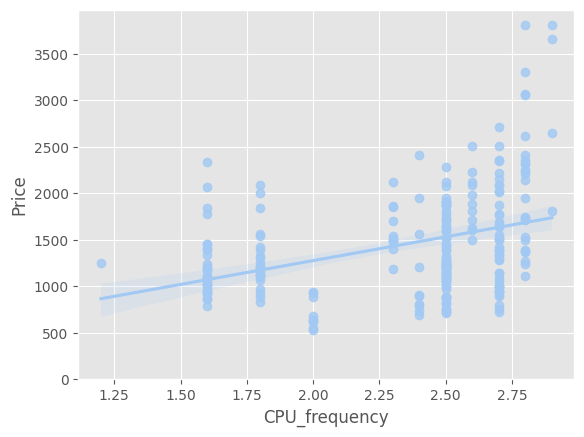

In [16]:
# Gráfico de regresión entre la frecuencia del CPU y el precio
sns.regplot(x="CPU_frequency", y="Price", data=df)

# Ajustamos el límite del eje Y para mayor claridad
plt.ylim(0,)

# Mostramos el gráfico
plt.show()

### ***2. Gráfico de regresión: Tamaño de pantalla vs Precio***



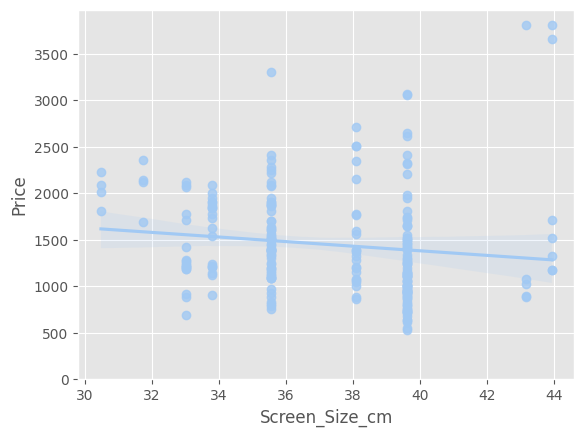

In [19]:
# Gráfico de regresión entre el tamaño de la pantalla y el precio
sns.regplot(x="Screen_Size_cm", y="Price", data=df)
plt.ylim(0,)
plt.show()

### ***3. Gráfico de regresión: Peso vs Precio***


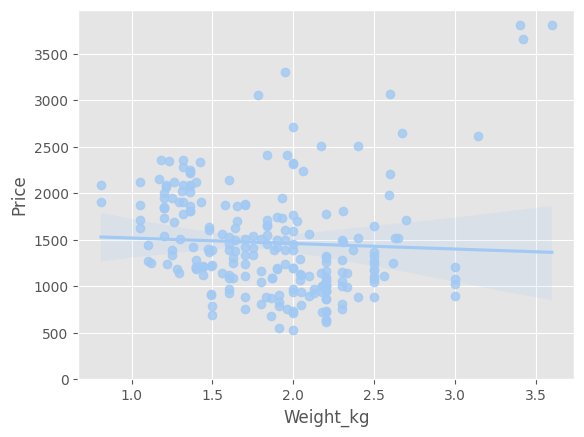

In [21]:
# Gráfico de regresión entre el peso del equipo y el precio
sns.regplot(x="Weight_kg", y="Price", data=df)
plt.ylim(0,)
plt.show()

### ***4. Valores de valoración con el Precio***



In [24]:
# Calcular y mostrar la correlación de cada variable con el precio
for param in ["CPU_frequency", "Screen_Size_cm", "Weight_kg"]:
    correlacion = df[[param, "Price"]].corr().iloc[0, 1]  # Extraemos el valor de correlación
    print(f"Correlación entre {param} y Price: {correlacion:.2f}")

Correlación entre CPU_frequency y Price: 0.37
Correlación entre Screen_Size_cm y Price: -0.13
Correlación entre Weight_kg y Price: -0.05


## **Interpretación de la correlación**

### **1. CPU_frequency vs. Price (0.37)**
- Existe una **correlación positiva moderada** entre la frecuencia del CPU y el precio de las computadoras portátiles.
- Esto sugiere que, en general, los dispositivos con CPUs más rápidas tienden a ser más costosos, aunque la relación no es lo suficientemente fuerte como para ser determinante.

### **2. Screen_Size_cm vs. Price (-0.13)**
- La correlación es **débilmente negativa**, lo que indica que un mayor tamaño de pantalla en centímetros tiende a estar ligeramente asociado con precios más bajos.
- Sin embargo, dado que el valor es cercano a 0, la relación no es significativa y probablemente existan otros factores más influyentes.

### **3. Weight_kg vs. Price (-0.05)**
- La correlación es **prácticamente nula**, lo que significa que el peso del portátil **no tiene una relación clara con su precio**.
- En otras palabras, tanto laptops livianas como pesadas pueden encontrarse en distintos rangos de precios sin un patrón claro.

## **Conclusión**
- La **frecuencia del CPU** es el factor con mayor influencia en el precio, aunque sigue siendo una correlación moderada.
- El **tamaño de pantalla y el peso** no parecen ser buenos predictores del precio.
- Es recomendable analizar otras variables como la cantidad de **RAM**, el **almacenamiento SSD** o la **marca** para entender mejor qué factores impactan más en el precio de los portátiles.



# **Análisis de características categóricas con diagramas de caja**  

En este ejercicio, generaremos diagramas de caja para visualizar la relación entre diferentes características categóricas y el precio de los laptops. Esto nos permitirá identificar tendencias y variaciones de precio en función de variables como el sistema operativo, la cantidad de núcleos del CPU, la RAM y el almacenamiento SSD.



**Generar Diagramas de Caja (Box Plots)**

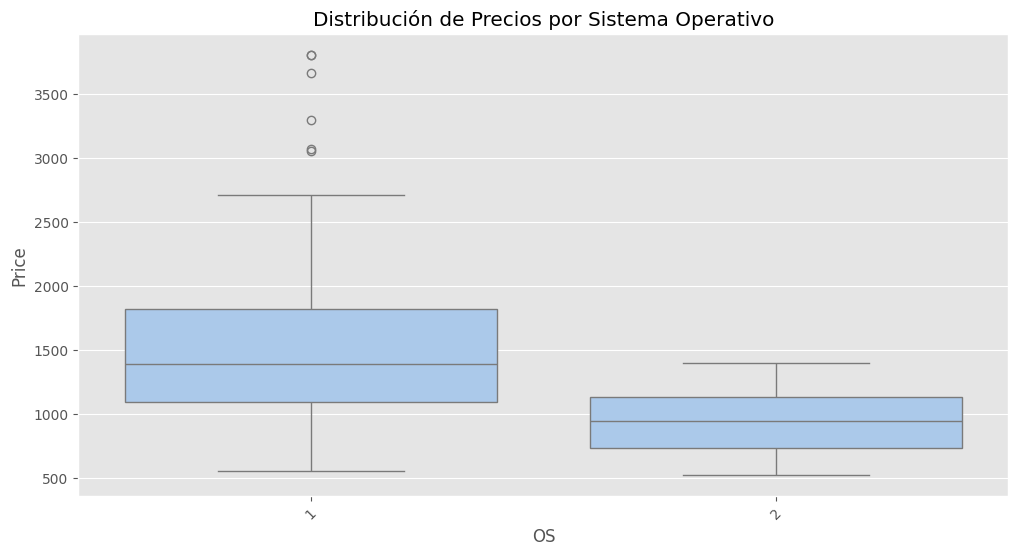

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="OS", y="Price", data=df)
plt.xticks(rotation=45)  # Rotar etiquetas para mejorar la visualización
plt.title("Distribución de Precios por Sistema Operativo")
plt.show()

In [28]:
# Calcular estadísticas descriptivas del precio por sistema operativo
stats_os = df.groupby("OS")["Price"].describe()
print(stats_os)

    count         mean         std    min     25%     50%      75%     max
OS                                                                        
1   224.0  1494.129464  573.798144  558.0  1091.0  1391.0  1821.50  3810.0
2    14.0   953.785714  274.927453  527.0   732.5   942.5  1135.75  1396.0


**Interpretación del Diagrama de Cajas para "OS" vs "Price"**
El diagrama de cajas nos permite visualizar la distribución del precio de los dispositivos según el sistema operativo (OS). A partir de los datos obtenidos, podemos analizar los siguientes aspectos clave:

**1. Comparación de la media y la dispersión de los precios**

***Sistema Operativo 1***

Media: 1494.13

Desviación estándar: 573.80 (alta dispersión)

Rango intercuartil (RIC): 1091,0 – 1821,5

Máximo: 3810.0

Mínimo: 558.0


🔹 Interpretación:

Este sistema operativo tiene un precio promedio más alto que el otro grupo.
Hay una gran variabilidad en los precios, con valores que llegan hasta 3810.
La mediana (1391.0) sugiere que la mitad de los dispositivos tienen precios menores a este valor.

***Sistema Operativo 2***

Media: 953.79

Desviación estándar: 274.93 (menor dispersión que OS 1)

Rango intercuartil (RIC): 732,5 – 1135,75

Máximo: 1396.0

Mínimo: 527.0

🔹 Interpretación:

Este sistema operativo tiene un precio promedio significativamente más bajo.
La variabilidad de los precios es menor en comparación con el OS 1.
La mediana (942.5) indica que la mayoría de los dispositivos con este sistema operativo tienen precios por debajo de 1000.

**2. Observaciones sobre la dispersión y posibles valores atípicos**

El OS 1 tiene una mayor dispersión de precios, con un rango más amplio y un máximo significativamente más alto que el de OS 2 . Esto sugiere que existen dispositivos premium dentro de este sistema operativo.
El OS 2 presenta menos dispersión y valores más concentrados, lo que indica que los precios de los dispositivos con este sistema son más consistentes.

**3. Relación entre el sistema operativo y el precio
Es evidente que el OS 1 está asociado con dispositivos más caros en promedio.**

El OS 2 , en cambio, parece estar presente en dispositivos de gama media o baja, con un precio máximo (1396.0) que apenas supera el percentil 75 de OS 1.

**Conclusión**

El análisis sugiere que el sistema operativo puede ser un factor influyente en el precio de los dispositivos. OS 1 está asociado con precios más altos y una mayor variabilidad, lo que indica la presencia de modelos premium. OS 2 , en cambio, presenta precios más estables y moderados. 🚀

### **Diagrama de caja para la variable "CPU_core" (Cantidad de Núcleos del CPU)**

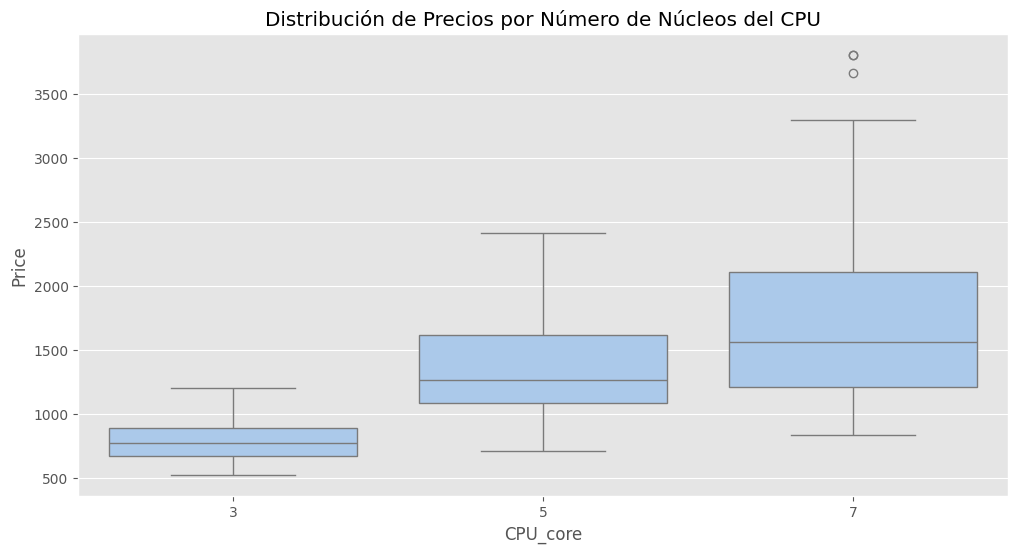

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="CPU_core", y="Price", data=df)
plt.title("Distribución de Precios por Número de Núcleos del CPU")
plt.show()

In [30]:
# Calcular estadísticas descriptivas del precio por numero de nucleos
stats_CPU_core = df.groupby("CPU_core")["Price"].describe()
print(stats_CPU_core)

          count         mean         std    min      25%     50%     75%  \
CPU_core                                                                   
3          20.0   781.750000  160.821534  527.0   672.25   773.5   893.0   
5         123.0  1367.869919  394.159636  710.0  1087.00  1268.0  1618.5   
7          95.0  1727.947368  666.380496  837.0  1210.50  1562.0  2110.5   

             max  
CPU_core          
3         1206.0  
5         2414.0  
7         3810.0  


🔹 **Interpretación**

A medida que aumenta el número de núcleos del procesador ( CPU_core ), el precio promedio del dispositivo también se incrementa.

Los dispositivos con 3 núcleos tienen el precio medio más bajo ( $781.75 ), mientras que los de 7 núcleos tienen el precio más alto ( $1727.95 ).
***Variabilidad:***
Los dispositivos con 3 núcleos tienen una menor dispersión de precios ( std = 160.82 ), lo que indica precios más homogéneos.

Los dispositivos con 7 núcleos presentan una gran variabilidad en los precios ( std = 666.38 ), lo que sugiere que pueden incluir tanto modelos de gama media como premium.

💡 **Conclusión:**

El número de núcleos está fuertemente relacionado con el precio. A mayor número de núcleos, mayor es el precio promedio y también la variabilidad de precios.

### **Diagrama de caja para la variable "RAM_GB" (Memoria RAM en GB)**

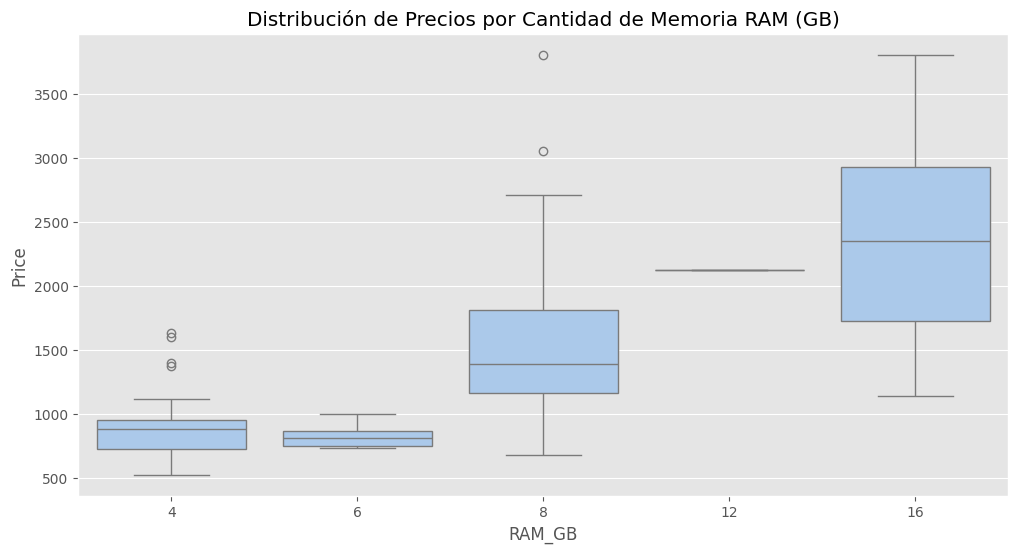

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="RAM_GB", y="Price", data=df)
plt.title("Distribución de Precios por Cantidad de Memoria RAM (GB)")
plt.show()

In [32]:
# Calcular estadísticas descriptivas del precio por RAM
stats_RAM_GB = df.groupby("RAM_GB")["Price"].describe()
print(stats_RAM_GB)

        count         mean         std     min      25%     50%     75%  \
RAM_GB                                                                    
4        33.0   909.818182  268.943820   527.0   727.00   888.0   951.0   
6         6.0   829.333333  102.770943   733.0   747.75   811.5   871.5   
8       184.0  1508.826087  477.110683   685.0  1164.50  1396.0  1813.5   
12        1.0  2125.000000         NaN  2125.0  2125.00  2125.0  2125.0   
16       14.0  2377.785714  840.282478  1142.0  1725.75  2355.0  2932.0   

           max  
RAM_GB          
4       1632.0  
6       1002.0  
8       3810.0  
12      2125.0  
16      3810.0  


🔹 **Interpretación**

Tendencia general: Los dispositivos con mayor RAM tienden a ser más caros.

RAM de 4GB y 6GB: Son las opciones más económicas, con una mediana inferior a 900.

RAM de 8GB: Tiene un precio promedio significativamente más alto ($1508.83), con mayor dispersión en los precios.

RAM de 16GB: Representa la opción más cara, con un precio máximo de $3810.0 , lo que sugiere que esta configuración se encuentra en modelos de gama alta o premium.

💡 **Conclusión:**

Los dispositivos con mayor capacidad de RAM tienen precios más elevados y una mayor variabilidad de precios, lo que indica la existencia de modelos básicos y avanzados dentro de cada categoría.

### **Diagrama de caja para la variable "Storage_GB_SSD" (Capacidad de Almacenamiento SSD en GB)**

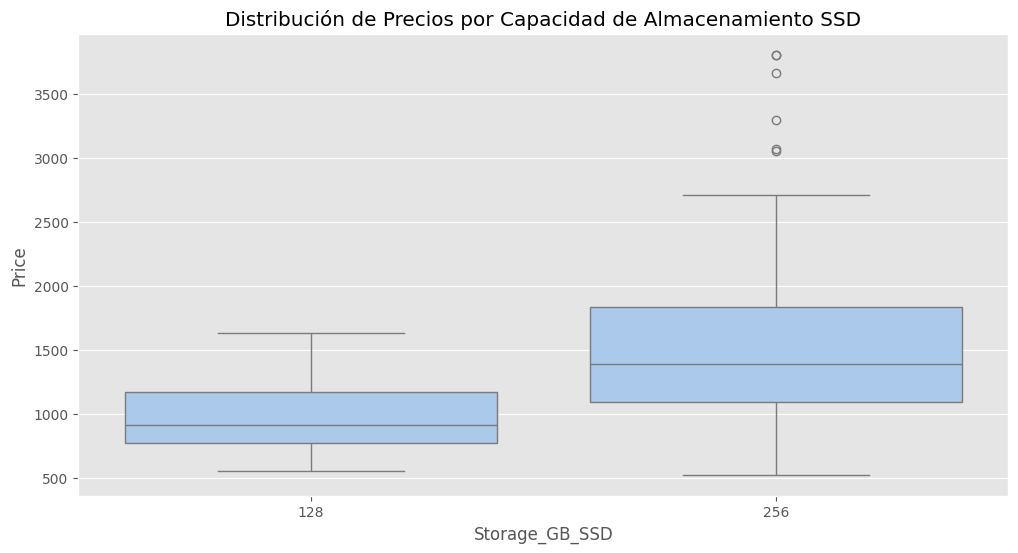

                count         mean         std    min     25%     50%     75%  \
Storage_GB_SSD                                                                  
128              19.0   988.473684  313.471489  558.0   773.5   913.0  1171.0   
256             219.0  1503.456621  574.080071  527.0  1098.5  1392.0  1841.5   

                   max  
Storage_GB_SSD          
128             1632.0  
256             3810.0  


In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
plt.title("Distribución de Precios por Capacidad de Almacenamiento SSD")
plt.show()

# Calcular estadísticas descriptivas del precio por capacidad de almacenamiento
stats_Storage_GB_SSD = df.groupby("Storage_GB_SSD")["Price"].describe()
print(stats_Storage_GB_SSD)

🔹 **Interpretación**

Los dispositivos con 256GB de SSD tienen un precio promedio más alto ($1503.46) en comparación con los de 128GB ($988.47).

***Diferencias en la dispersión:***

Los precios de los dispositivos de 128GB son más estables (std = 313.47), mientras que los de 256GB tienen una dispersión mayor (std = 574.08), lo que sugiere una mayor variedad de modelos en esta categoría.

***Mediana:***

La mediana en 128GB es `$913.0`, lo que indica que la mayoría de los dispositivos con esta capacidad se encuentran por debajo de los `$1000`.

Para 256 GB , la mediana sube a $1392.0 , lo que confirma que esta configuración está asociada con precios más altos.

💡 **Conclusión:**

El almacenamiento SSD tiene un impacto positivo en el precio, con los dispositivos de 256GB costando significativamente más en promedio que los de 128GB. Esto sugiere que la capacidad de almacenamiento es otro factor importante en la fijación de precios . 🚀

###**Conclusión**
Los diagramas de caja nos permiten visualizar la dispersión de los precios en función de cada variable categórica. A través de este análisis, podemos identificar patrones generales, como el impacto de la cantidad de memoria RAM y la capacidad de almacenamiento en los precios de los portátiles.

##**Estadísticas descriptivas generales**

In [35]:
# Generar estadísticas descriptivas de todas las variables numéricas
print("📊 Estadísticas de variables numéricas:")
print(df.describe())

📊 Estadísticas de variables numéricas:
       Unnamed: 0    Category         GPU          OS    CPU_core  \
count  238.000000  238.000000  238.000000  238.000000  238.000000   
mean   118.500000    3.205882    2.151261    1.058824    5.630252   
std     68.848868    0.776533    0.638282    0.235790    1.241787   
min      0.000000    1.000000    1.000000    1.000000    3.000000   
25%     59.250000    3.000000    2.000000    1.000000    5.000000   
50%    118.500000    3.000000    2.000000    1.000000    5.000000   
75%    177.750000    4.000000    3.000000    1.000000    7.000000   
max    237.000000    5.000000    3.000000    2.000000    7.000000   

       Screen_Size_cm  CPU_frequency      RAM_GB  Storage_GB_SSD   Weight_kg  \
count      234.000000     238.000000  238.000000      238.000000  233.000000   
mean        37.269615       2.360084    7.882353      245.781513    1.862232   
std          2.971365       0.411393    2.482603       34.765316    0.494332   
min         30.4800

✍ Se obtiene un resumen estadístico de las variables numéricas, incluyendo lA mediA, desviación estándar y valores extremos.

##**Análisis de variables categóricas**

In [36]:
# Generar estadísticas para variables categóricas
print("📌 Estadísticas de variables categóricas:")
print(df.describe(include=['object']))

📌 Estadísticas de variables categóricas:
       Manufacturer   Screen
count           238      238
unique           11        2
top            Dell  Full HD
freq             71      161


✍ Se analiza la distribución de las variables categóricas, mostrando cuántas categorías únicas existen y cuál es la más frecuente.

##**Generar estadísticas descriptivas para todas las variables**

In [37]:
# Generar estadísticas descriptivas para todas las variables, incluyendo categóricas
print(df.describe(include='all'))

        Unnamed: 0 Manufacturer    Category   Screen         GPU          OS  \
count   238.000000          238  238.000000      238  238.000000  238.000000   
unique         NaN           11         NaN        2         NaN         NaN   
top            NaN         Dell         NaN  Full HD         NaN         NaN   
freq           NaN           71         NaN      161         NaN         NaN   
mean    118.500000          NaN    3.205882      NaN    2.151261    1.058824   
std      68.848868          NaN    0.776533      NaN    0.638282    0.235790   
min       0.000000          NaN    1.000000      NaN    1.000000    1.000000   
25%      59.250000          NaN    3.000000      NaN    2.000000    1.000000   
50%     118.500000          NaN    3.000000      NaN    2.000000    1.000000   
75%     177.750000          NaN    4.000000      NaN    3.000000    1.000000   
max     237.000000          NaN    5.000000      NaN    3.000000    2.000000   

          CPU_core  Screen_Size_cm  CPU

✍ Se obtiene un resumen general del conjunto de datos, incorporando tanto variables numéricas como categóricas.



##📊 **Análisis de Datos con Tablas Dinámicas y Gráficos de Color**
En esta sección, aprenderemos a agrupar datos utilizando GroupBy y tablas dinámicas (tablas dinámicas) en Pandas. Luego, representaremos visualmente la relación entre la GPU, la cantidad de núcleos del CPU y el precio mediante un mapa de colores con `pcolor`.

🔹 **Agrupar y Crear la Tabla Dinámica**

In [38]:
# Agrupar los datos por GPU y número de núcleos del CPU, tomando el precio promedio
grouped_test1 = df.groupby(["GPU", "CPU_core"])["Price"].mean().reset_index()

# Crear una tabla dinámica con la GPU como índice y CPU_core como columnas
pivot_table = grouped_test1.pivot(index="GPU", columns="CPU_core", values="Price")

# Mostrar la tabla generada
print(pivot_table)

CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


✍

Agrupamos los datos por GPU y CPU_core, calculando el precio promedio para cada combinación.

Creamos una tabla dinámica (tabla dinámica) donde las filas representan las GPU, las columnas los núcleos del CPU y los valores corresponden al precio medio.

Esto permite visualizar cómo cambia el precio en función de estos dos factores.

##🔹 **Crear el Mapa de Colores con `pcolor`**

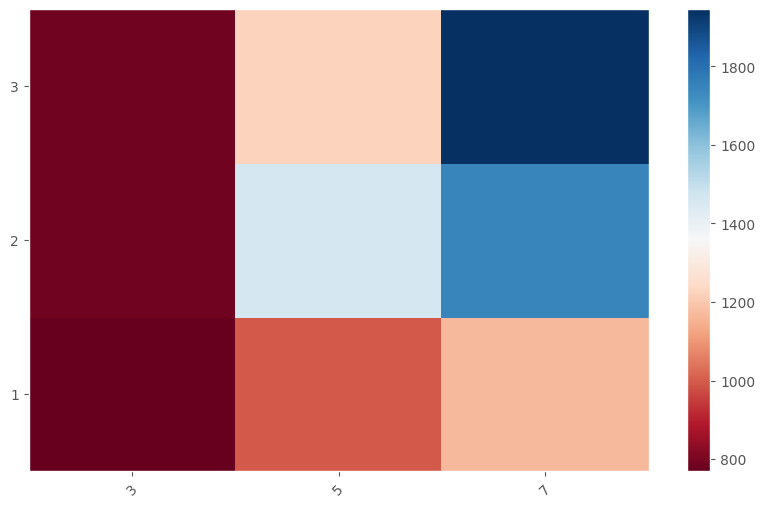

In [39]:
# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el mapa de calor con la tabla dinámica
im = ax.pcolor(pivot_table, cmap="RdBu")

# Obtener etiquetas de filas y columnas
row_labels = pivot_table.index  # Nombres de las GPUs
col_labels = pivot_table.columns  # Número de núcleos del CPU

# Ajustar la ubicación de las etiquetas en los ejes
ax.set_xticks(np.arange(pivot_table.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_table.shape[0]) + 0.5, minor=False)

# Asignar etiquetas a los ejes
ax.set_xticklabels(col_labels, minor=False, rotation=45)  # Rotamos para mejor legibilidad
ax.set_yticklabels(row_labels, minor=False)

# Agregar barra de colores para interpretar los valores
fig.colorbar(im)

# Mostrar el gráfico
plt.show()

✍

Se utiliza pcolorpara representar visualmente la tabla dinámica como un mapa de calor.

Se asignan etiquetas a los ejes X e Y para indicar los núcleos de la CPU y los modelos de GPU, respectivamente.

Se añade una barra de color, donde los tonos fríos representan precios bajos y los cálidos precios altos.

##📊 **Evaluación de la Correlación de Pearson y Significancia Estadística**

En este análisis, exploraremos la relación entre diferentes características de las laptops y su precio utilizando el coeficiente de evaluación de Pearson y su respectivo p-valor.

📌 ***¿Por qué es importante?***

El coeficiente de Pearson mide la fuerza y ​​dirección de la relación lineal entre dos variables (valores entre -1 y 1).
El p-valor indica si la compensación observada es estadísticamente significativa (si P < 0.05 , la compensación es fuerte y no debida al azar).

🔹 **Calcular la Correlación de `Pearson`**

In [42]:
# Lista de variables numéricas a evaluar en relación con el precio
parametros = ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_cm',
              'Weight_kg', 'CPU_core']

# Filtrar el DataFrame para eliminar filas con valores NaN o Inf
df_clean = df[parametros + ['Price']].replace([np.inf, -np.inf], np.nan).dropna()

# Iterar sobre cada parámetro y calcular la correlación de Pearson con el precio
for param in parametros:
    # Calcular coeficiente de correlación de Pearson y p-valor
    pearson_coef, p_value = stats.pearsonr(df_clean[param], df_clean['Price'])

    # Imprimir resultados
    print(f"\n🔹 Parámetro: {param}")
    print(f"📈 Coeficiente de Pearson: {pearson_coef:.4f}")
    print(f"📊 P-valor: {p_value:.4f}")

    # Interpretación rápida de la significancia
    if p_value < 0.05:
        print("✅ Relación estadísticamente significativa con el precio.")
    else:
        print("❌ No hay suficiente evidencia para una relación significativa con el precio.")


🔹 Parámetro: RAM_GB
📈 Coeficiente de Pearson: 0.5739
📊 P-valor: 0.0000
✅ Relación estadísticamente significativa con el precio.

🔹 Parámetro: CPU_frequency
📈 Coeficiente de Pearson: 0.3891
📊 P-valor: 0.0000
✅ Relación estadísticamente significativa con el precio.

🔹 Parámetro: Storage_GB_SSD
📈 Coeficiente de Pearson: 0.2467
📊 P-valor: 0.0002
✅ Relación estadísticamente significativa con el precio.

🔹 Parámetro: Screen_Size_cm
📈 Coeficiente de Pearson: -0.1317
📊 P-valor: 0.0466
✅ Relación estadísticamente significativa con el precio.

🔹 Parámetro: Weight_kg
📈 Coeficiente de Pearson: -0.0400
📊 P-valor: 0.5470
❌ No hay suficiente evidencia para una relación significativa con el precio.

🔹 Parámetro: CPU_core
📈 Coeficiente de Pearson: 0.4722
📊 P-valor: 0.0000
✅ Relación estadísticamente significativa con el precio.


# 🎉 ¡Felicidades! Has completado la práctica. 🎉  

> _"El aprendizaje no es un producto de la enseñanza. Es el producto de la actividad de los estudiantes." – **John Holt**_  

✨ ¡Sigue adelante con curiosidad y determinación! 🚀📚
